In [1]:
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.DataFrame()
i = 1
while i < 920:
    time.sleep(2)
    url = f"https://pokeapi.co/api/v2/move/{i}/"
    r = requests.get(url)
    new_data = pd.json_normalize(r.json())
    df = pd.concat([df, new_data], axis = 0)
    i = i + 1

In [2]:
moves = pd.read_csv("move_data.csv")
moves = moves[["name", "power", "accuracy", "pp", "damage_class.name", "type.name", "target.name"]]
moves = moves.rename(columns = {"damage_class.name": "damage class", "type.name": "type", "target.name": "target"})

In [6]:
moves["accuracy"].describe()

count    634.000000
mean      95.118297
std       11.575436
min        0.000000
25%       95.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: accuracy, dtype: float64

In [17]:
#moves.columns
#moves[["meta.ailment.name", "meta.ailment_chance", "meta.category.name", "meta.crit_rate", "meta.drain", "meta.flinch_chance", "meta.healing"]]

In [3]:
print(moves.head().to_markdown(index = False))

| name        |   power |   accuracy |   pp | damage class   | type     | target           |
|:------------|--------:|-----------:|-----:|:---------------|:---------|:-----------------|
| pound       |      40 |        100 |   35 | physical       | normal   | selected-pokemon |
| karate-chop |      50 |        100 |   25 | physical       | fighting | selected-pokemon |
| double-slap |      15 |         85 |   10 | physical       | normal   | selected-pokemon |
| comet-punch |      18 |         85 |   15 | physical       | normal   | selected-pokemon |
| mega-punch  |      80 |         85 |   20 | physical       | normal   | selected-pokemon |


In [4]:
print(moves[moves["accuracy"].isna()][["name", "accuracy", "target"]].head(n = 10).to_markdown(index = False))

| name         |   accuracy | target           |
|:-------------|-----------:|:-----------------|
| swords-dance |        nan | user             |
| whirlwind    |        nan | selected-pokemon |
| roar         |        nan | selected-pokemon |
| mist         |        nan | users-field      |
| growth       |        nan | user             |
| meditate     |        nan | user             |
| agility      |        nan | user             |
| teleport     |        nan | user             |
| mimic        |        nan | selected-pokemon |
| double-team  |        nan | user             |


In [66]:
print(moves[moves["power"].isna()][["name", "power", "damage class"]].head(n = 10).to_markdown(index = False))

| name         |   power | damage class   |
|:-------------|--------:|:---------------|
| guillotine   |     nan | physical       |
| swords-dance |     nan | status         |
| whirlwind    |     nan | status         |
| sand-attack  |     nan | status         |
| horn-drill   |     nan | physical       |
| tail-whip    |     nan | status         |
| leer         |     nan | status         |
| growl        |     nan | status         |
| roar         |     nan | status         |
| sing         |     nan | status         |


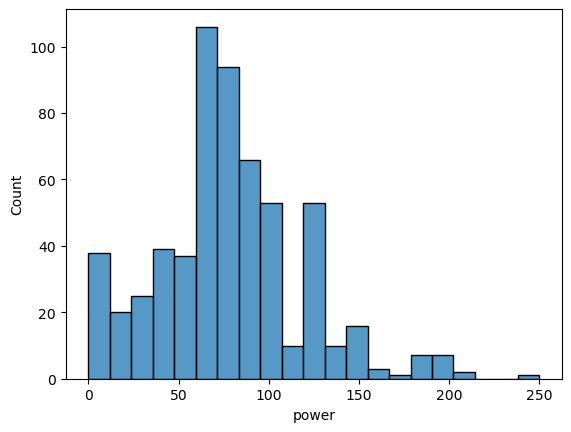

In [35]:
sns.histplot(data = moves, x = "power")
plt.show()

In [36]:
print(moves["power"].describe().to_markdown())

|       |    power |
|:------|---------:|
| count | 588      |
| mean  |  77.4541 |
| std   |  40.9561 |
| min   |   0      |
| 25%   |  50      |
| 50%   |  80      |
| 75%   | 100      |
| max   | 250      |


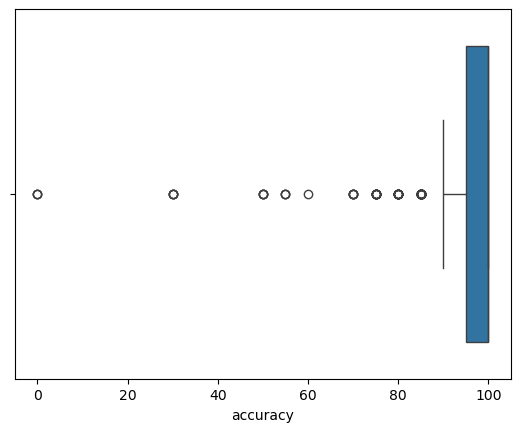

In [37]:
sns.boxplot(data = moves, x = "accuracy")
plt.show()

In [38]:
print(moves["accuracy"].describe().to_markdown())

|       |   accuracy |
|:------|-----------:|
| count |   634      |
| mean  |    95.1183 |
| std   |    11.5754 |
| min   |     0      |
| 25%   |    95      |
| 50%   |   100      |
| 75%   |   100      |
| max   |   100      |


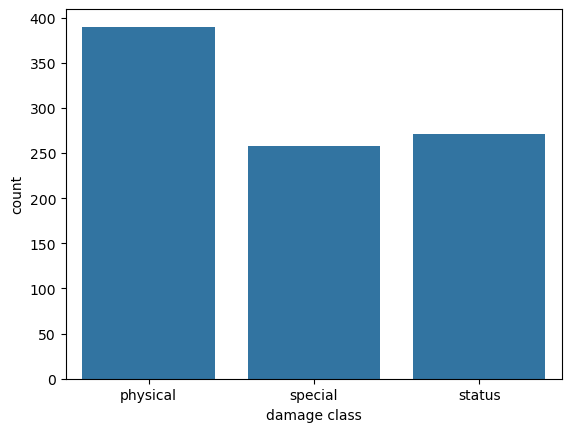

In [7]:
sns.countplot(data = moves, x = "damage class")
plt.savefig('../STAT386-BLOG-THEME/assets/images/damage_class_distribution.png')
plt.show()

In [67]:
print(moves.groupby("type").size().sort_values().to_markdown())

| type     |   0 |
|:---------|----:|
| rock     |  26 |
| dragon   |  31 |
| ground   |  31 |
| flying   |  31 |
| ice      |  33 |
| fairy    |  33 |
| bug      |  34 |
| ghost    |  34 |
| poison   |  36 |
| steel    |  38 |
| fire     |  47 |
| electric |  49 |
| water    |  49 |
| dark     |  52 |
| fighting |  57 |
| grass    |  59 |
| psychic  |  79 |
| normal   | 200 |


In [ ]:
# Relationships between variables

In [59]:
print(moves.groupby("type").agg({"accuracy": "median"}).sort_values(by = "accuracy").head().to_markdown())

| type    |   accuracy |
|:--------|-----------:|
| rock    |       92.5 |
| ice     |       95   |
| bug     |      100   |
| psychic |      100   |
| poison  |      100   |


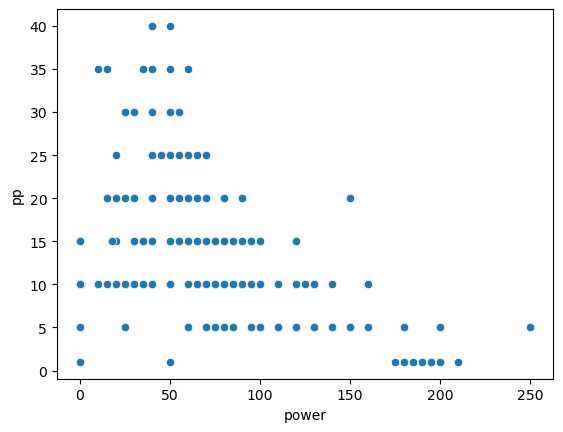

In [64]:
sns.scatterplot(data = moves, x = "power", y = "pp")
plt.show()

In [65]:
print(moves[["power", "pp"]].corr().to_markdown())

|       |     power |        pp |
|:------|----------:|----------:|
| power |  1        | -0.514725 |
| pp    | -0.514725 |  1        |


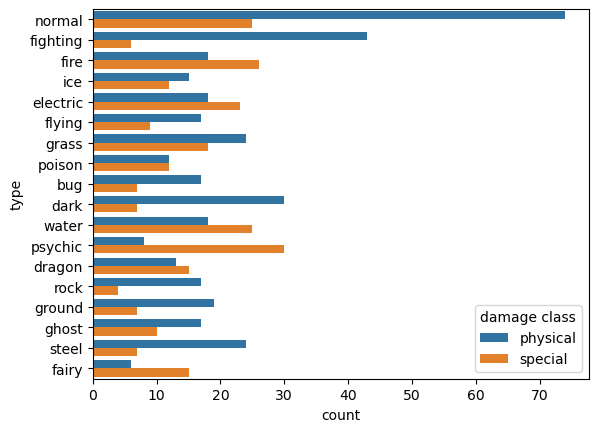

In [63]:
sns.countplot(data = moves[moves["damage class"] != "status"], y = "type", hue = "damage class")
plt.show()

In [16]:
moves.groupby("damage class").agg({"power": ["mean", "std"]})

power           
                   mean        std
damage class                      
physical      74.083573  40.141821
special       88.160000  36.680586
status         0.000000   0.000000